In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
from scipy.signal import find_peaks

In [92]:
def read_file(filename = 'HBA_HW/DEAP/Data/s10_Trial20'):
    f = open(filename, "r")
    scr = []
    i = 0
    for line in f:
        if i>1920:
            break
        scr.append(line)
        i = i+1
        
    return scr

In [93]:
scr1 = read_file('HBA_HW/DEAP/Data/s01_Trial20')
scr2 = read_file('HBA_HW/DEAP/Data/s02_Trial20')
scr3 = read_file('HBA_HW/DEAP/Data/s03_Trial20')
scr4 = read_file('HBA_HW/DEAP/Data/s04_Trial20')

In [94]:
x1 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\DEAP\Data\s01_Trial20")
x2 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\DEAP\Data\s02_Trial20")
x3 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\DEAP\Data\s03_Trial20")
x4 = np.loadtxt(r"C:\Users\SAM-PC\Downloads\HBA_HW\DEAP\Data\s04_Trial20")

In [95]:
def findpeaks(data, spacing, limit):
    #print(len(data),spacing)
    x = np.zeros(len(data) + 2 * spacing)
    x[:spacing] = data[0] - 1.e-6
    x[-spacing:] = data[-1] - 1.e-6
    x[spacing:spacing + len(data)] = data
    peak_candidate = np.zeros(len(data))
    peak_candidate[:] = True
    for s in range(spacing):
        start = spacing - s - 1
        h_b = x[start: start + len(data)]  # before
        start = spacing
        h_c = x[start: start + len(data)]  # central
        start = spacing + s + 1
        h_a = x[start: start + len(data)]  # after
        peak_candidate = np.logical_and(peak_candidate, np.logical_and(h_c > h_b, h_c > h_a))
    ind = np.argwhere(peak_candidate)
    ind = ind.reshape(ind.size)
    if limit is not None:
        ind = ind[data[ind] > limit]
    return ind

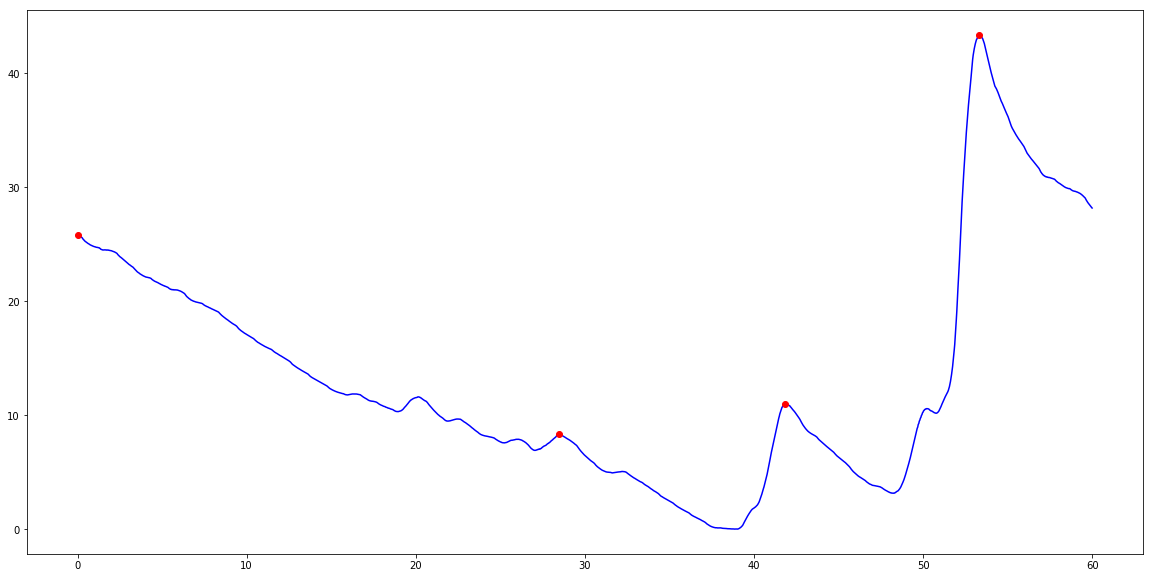

In [96]:
Fs=32
(findpeaks_limit,findpeaks_spacing)=(1,100)
peaks_indices = findpeaks(x1,findpeaks_spacing,findpeaks_limit)
plt.figure(figsize=(20,10));plt.plot(np.linspace(1,len(x1),len(x1))/Fs,x1,'b-',peaks_indices/Fs,x1[peaks_indices], 'ro')

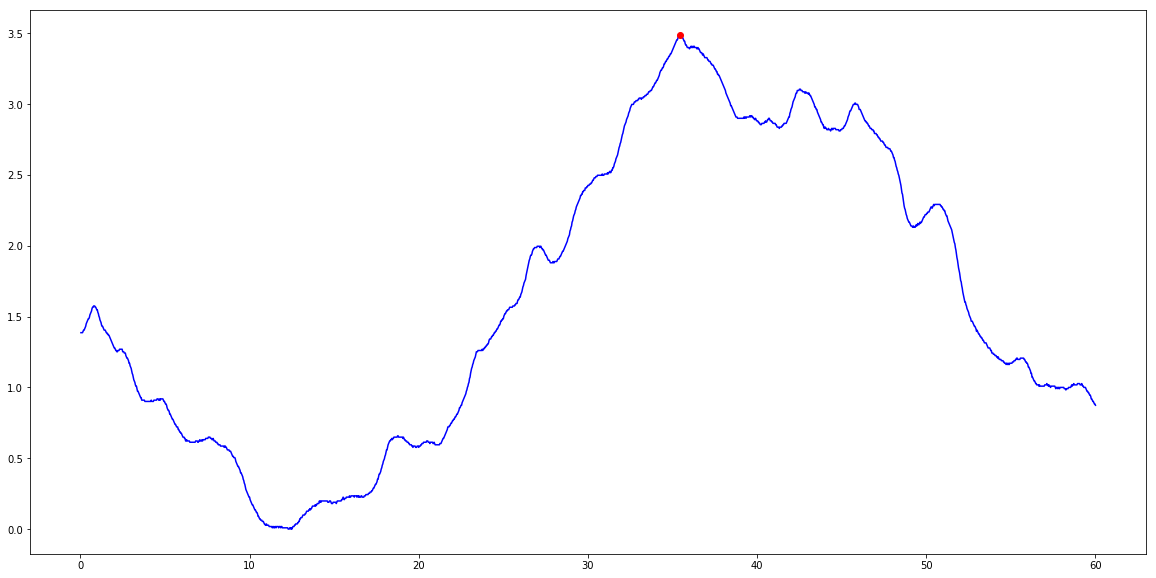

In [97]:
Fs=32
(findpeaks_limit,findpeaks_spacing)=(1,100)
peaks_indices = findpeaks(x2,findpeaks_spacing,findpeaks_limit)
plt.figure(figsize=(20,10));plt.plot(np.linspace(1,len(x2),len(x2))/Fs,x2,'b-',peaks_indices/Fs,x2[peaks_indices], 'ro')

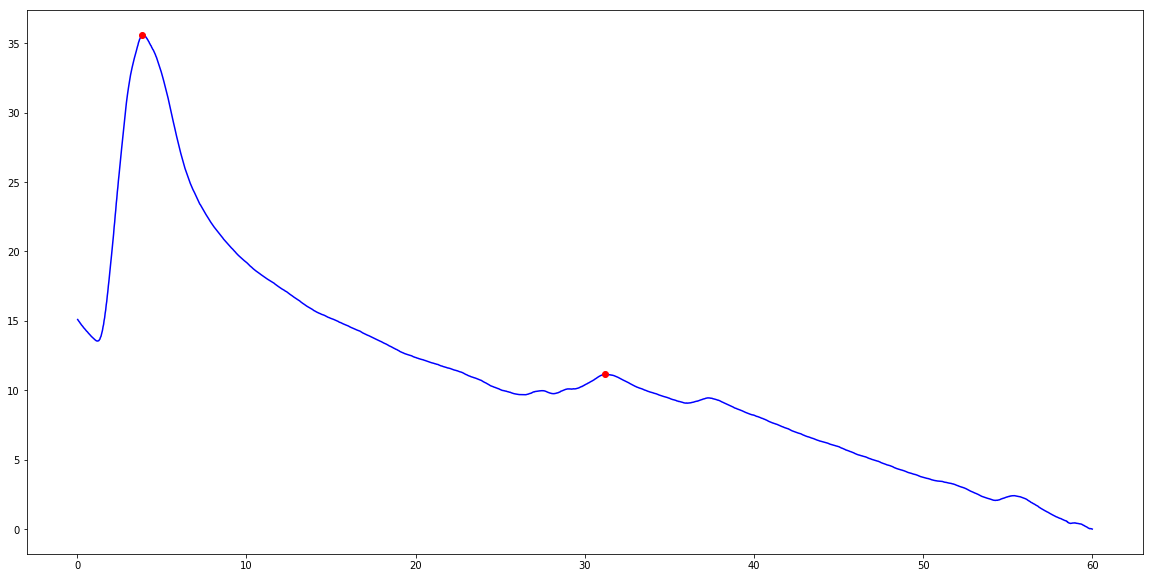

In [98]:
Fs=32
(findpeaks_limit,findpeaks_spacing)=(1,100)
peaks_indices = findpeaks(x3,findpeaks_spacing,findpeaks_limit)
plt.figure(figsize=(20,10));plt.plot(np.linspace(1,len(x3),len(x3))/Fs,x3,'b-',peaks_indices/Fs,x3[peaks_indices], 'ro')

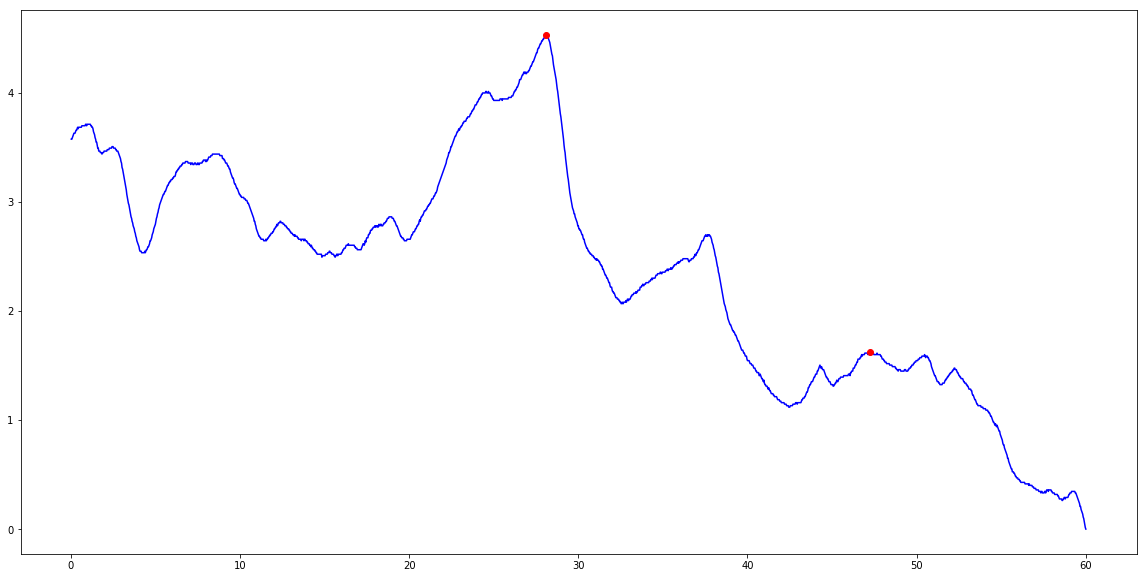

In [99]:
Fs=32
(findpeaks_limit,findpeaks_spacing)=(1,100)
peaks_indices = findpeaks(x4,findpeaks_spacing,findpeaks_limit)
plt.figure(figsize=(20,10));plt.plot(np.linspace(1,len(x4),len(x2))/Fs,x4,'b-',peaks_indices/Fs,x4[peaks_indices], 'ro')

In [100]:
mean_eda = []
scr_freq = []
scr_amp = []

arr1 = np.asarray(scr1).astype(np.float64)
peaks, _ = find_peaks(arr1, distance=16)
scr_freq1 = len(peaks)
print(scr_freq1)
scr_freq.append(scr_freq1)
mean_eda1 = np.mean(arr1,dtype=np.float64)
print(mean_eda1)
mean_eda.append(mean_eda1)
avg_amp1 = np.mean(arr1[peaks],dtype=np.float64)
print(avg_amp1)
scr_amp.append(avg_amp1)

arr2 = np.asarray(scr2).astype(np.float64)
peaks, _ = find_peaks(arr2, distance=16)
scr_freq2 = len(peaks)
print(scr_freq2)
scr_freq.append(scr_freq2)
mean_eda2 = np.mean(arr2,dtype=np.float64)
print(mean_eda2)
mean_eda.append(mean_eda2)
avg_amp2 = np.mean(arr1[peaks],dtype=np.float64)
print(avg_amp2)
scr_amp.append(avg_amp2)

arr3 = np.asarray(scr3).astype(np.float64)
peaks, _ = find_peaks(arr3, distance=16)
scr_freq3 = len(peaks)
print(scr_freq3)
scr_freq.append(scr_freq3)
mean_eda3 = np.mean(arr3,dtype=np.float64)
print(mean_eda3)
mean_eda.append(mean_eda3)
avg_amp3 = np.mean(arr1[peaks],dtype=np.float64)
print(avg_amp3)
scr_amp.append(avg_amp3)

arr4 = np.asarray(scr4).astype(np.float64)
peaks, _ = find_peaks(arr4, distance=16)
scr_freq4 = len(peaks)
print(scr_freq4)
scr_freq.append(scr_freq4)
mean_eda4 = np.mean(arr4,dtype=np.float64)
print(mean_eda4)
mean_eda.append(mean_eda4)
avg_amp4 = np.mean(arr1[peaks],dtype=np.float64)
print(avg_amp4)
scr_amp.append(avg_amp4)

19
13.569166960416668
14.315322315789475
43
1.624496295833333
15.310941395348838
21
11.3343698390625
12.541862857142855
47
2.36254698125
12.493362765957448


In [89]:
part = [1, 2, 3, 4]
trial = [20, 20, 20, 20]
valence = [7.35, 8.01, 7.91, 1.77]
arousal = [6.95, 7.1, 2.97, 2.06]
col = ['Id']
df = pd.DataFrame(part, columns=col)
df['Trial'] = trial
df['Average EDA'] = mean_eda
df['SCR Frequency'] = scr_freq
df['SCR Amplitude'] = scr_amp
df['Valence'] = valence
df['Arousal'] = arousal
df.head(4)

,Id,Trial,Average EDA,SCR Frequency,SCR Amplitude,Valence,Arousal
0,1,20,13.569167,19,14.315322,7.35,6.95
1,2,20,1.624496,43,15.310941,8.01,7.10
2,3,20,11.334370,21,12.541863,7.91,2.97
3,4,20,2.362547,47,12.493363,1.77,2.06


In [90]:
df.corr()

,Id,Trial,Average EDA,SCR Frequency,SCR Amplitude,Valence,Arousal
Id,1.000000,NaN,-0.504865,0.550161,-0.766833,-0.722897,-0.922513
Trial,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average EDA,-0.504865,NaN,1.000000,-0.982611,-0.157720,0.466393,0.135970
SCR Frequency,0.550161,NaN,-0.982611,1.000000,0.073216,-0.612670,-0.205172
SCR Amplitude,-0.766833,NaN,-0.157720,0.073216,1.000000,0.559370,0.954951
Valence,-0.722897,NaN,0.466393,-0.612670,0.559370,1.000000,0.659384
Arousal,-0.922513,NaN,0.135970,-0.205172,0.954951,0.659384,1.000000
